<a href="https://colab.research.google.com/github/mdahal04/Energy-dataset/blob/main/sample_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [10]:
energy = pd.read_excel("/content/ENB2012_data.xlsx")
#dropping irrelevant column
energy.columns
filtered_energy= energy.drop(['X6'],axis=1)

#cleaning data
energy_cleaned = filtered_energy.dropna()
energy_cleaned


,X1,X2,X3,X4,X5,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,0.4,5,16.48,16.61


In [11]:
#linear regression for heating load
X= energy_cleaned[['X1', 'X2', 'X3','X4','X5','X7','X8']]
y= energy_cleaned['Y1']

X = pd.get_dummies(X, drop_first=True).astype("float32")

X = sm.tools.tools.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     Y1   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     1387.
Date:                Tue, 02 Sep 2025   Prob (F-statistic):               0.00
Time:                        14:17:55   Log-Likelihood:                -1912.5
No. Observations:                 768   AIC:                             3839.
Df Residuals:                     761   BIC:                             3871.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         83.9316     19.019      4.413      0.0

**Observations:**

* R-squared = 0.916 suggests that the independent variables have high predictive power for dependent variable.

* The regression line fits the model very well.

* For each independent variables, the p values are less than 0.05, which suggests that every independent variables have significant influence on dependent variable.

/tmp/ipython-input-3496301734.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'north' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  energy.loc[energy['X6'] == 2, 'X6'] = 'north'
/tmp/ipython-input-3496301734.py:9: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.barplot(energy,x="X2",y="Y2", hue="X6",palette=sns.color_palette("Set2"))


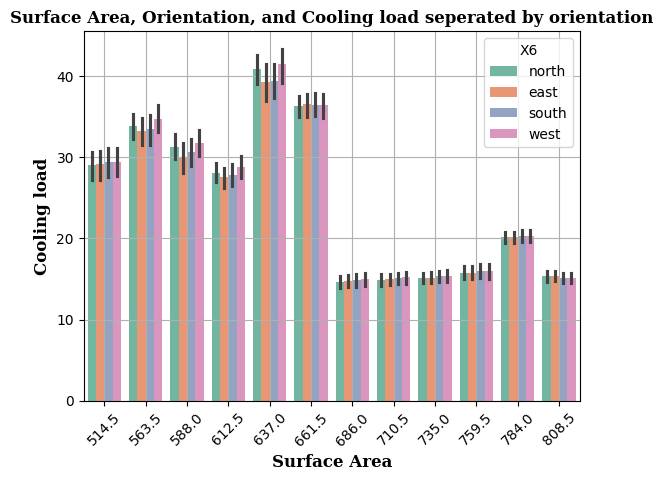

In [12]:
#visualizing relationship between surface area, orientation and the cooling/heating load of a building

#renaming the orientations to their respective names to make it easier for readers to understand
energy.loc[energy['X6'] == 2, 'X6'] = 'north'
energy.loc[energy['X6'] == 3, 'X6'] = 'east'
energy.loc[energy['X6'] == 4, 'X6'] = 'south'
energy.loc[energy['X6'] == 5, 'X6'] = 'west'

sns.barplot(energy,x="X2",y="Y2", hue="X6",palette=sns.color_palette("Set2"))
newfont = {'fontname': 'serif', 'fontsize': 12,'fontweight': 'bold'}
plt.title('Surface Area, Orientation, and Cooling load seperated by orientation',fontdict=newfont)
plt.xlabel("Surface Area",fontdict=newfont)
plt.ylabel("Cooling load",fontdict=newfont)
plt.xticks(rotation=45)
plt.grid()
plt.show()

**Note**

* The vertical line on the barplot represents the standard deviation; the range of values.

**Observations from graphs**
*   The graph shows that a larger surface area tends to result in a lower heating/cooling load.
*   There seems to be no significant difference in heating/cooling load between different orientations.
* Standard deviation of heating/cooling load decreases as the surface area increases, indicating that larger surface areas lead to predictable energy performance
* As surface area increases, external factors (e.g., orientation, grazing area) have less influence on energy efficiency. Larger buildings may be less sensitive to these variations due to a more uniform heat distribution or other structural factors.